## Replication code for
# The Hockey Stick Phillips Curve and the Zero Lower Bound
### Gregor Boehl & Philipp Lieberknecht

First, install the necessary packages. Do this either here (uncomment the cell below) or with your prefered package manager.

In [1]:
#!pip install pydsge
#!pip install requests

Do some imports:

In [1]:
# imports
import requests
import tempfile
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from pydsge import DSGE
from grgrlib import *

# if you run this in a jupyter notebook:
%matplotlib inline

All estimations and simulations are done using my pydsge package. The documentation of the package can be found here:
https://pydsge.readthedocs.io

The YAML file which contains the model is hosted as part of my project library: https://github.com/gboehl/projectlib/blob/master/yamls/fnk.yaml

The following code will download it to a temporary file and parse the model:

In [2]:
path = "https://raw.githubusercontent.com/gboehl/projectlib/refs/heads/master/yamls/fnk.yaml"

# download yaml
dl = requests.get(path)

# write content to temporary file
temp = tempfile.NamedTemporaryFile()
with open(temp.name, 'wb') as f:
    f.write(dl.content)

# parse temporary file
mod = DSGE.read(temp.name)

Set up plotting info:

In [3]:
v = ['Pi', 'y', 'mc', 'r']
vp = ['Inflation', 'Output', 'Marginal costs', 'Interest rate']

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.magma(np.linspace(.35,.85,6))[::-1])

Initialize model:

In [4]:
p = mod.set_par('calib')
p = mod.set_par('nu',.25)

## The left side of Figure 3

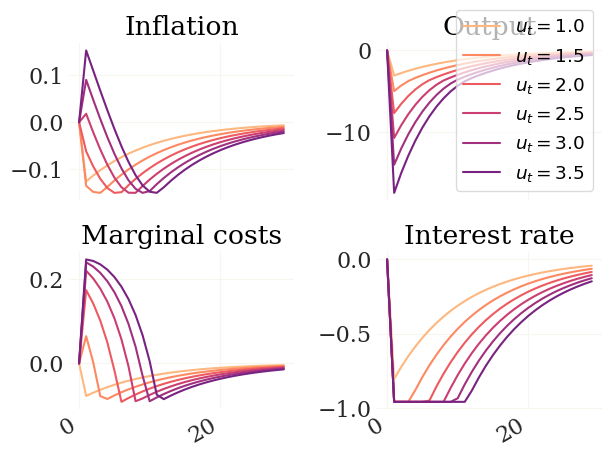

In [5]:
n = 6
uvals = np.linspace(1,3.5,n)

# simulate
x0 = tuple([mod.irfs(('e_u',s,1), verbose=True)[0][v] for s in uvals])

# plot
figs, axs = figurator(2,2,1)
pplot(x0, ax=axs, labels=vp, legend=['$u_t=%s$' %s for s in uvals.round(2)])
axs[1].legend(loc='lower right', framealpha=.7)
figs[0].tight_layout()

## The right side of Figure 3

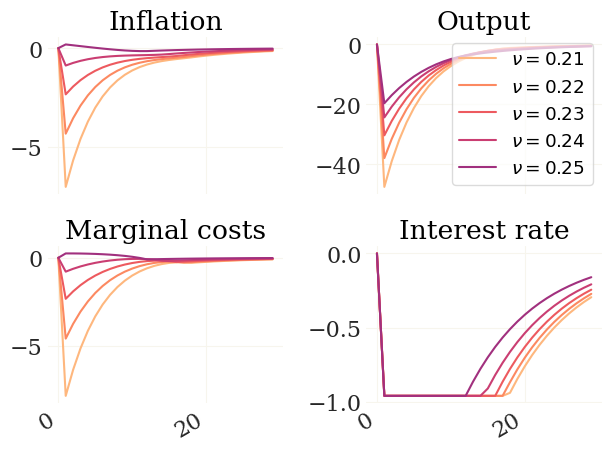

In [6]:
nuvals = (.21, .22, .23, .24, .25)
n = len(nuvals)

# simulate
pars = [mod.set_par('nu', nu, p) for nu in nuvals]
x1 = tuple([mod.irfs(('e_u',3.8,1), p)[0][v] for p in pars])

# plot
figs, axs = figurator(2,2,1)
pplot(x1, ax=axs, labels=vp, legend=['$\\nu=%s$' %nu for nu in nuvals])
axs[1].legend(loc='lower right', framealpha=.7)
figs[0].tight_layout()

## Figure 4

[irfs:]        No OBC solution(s) found.
[irfs:]        No OBC solution(s) found.
[irfs:]        No OBC solution(s) found.
[irfs:]        No OBC solution(s) found.


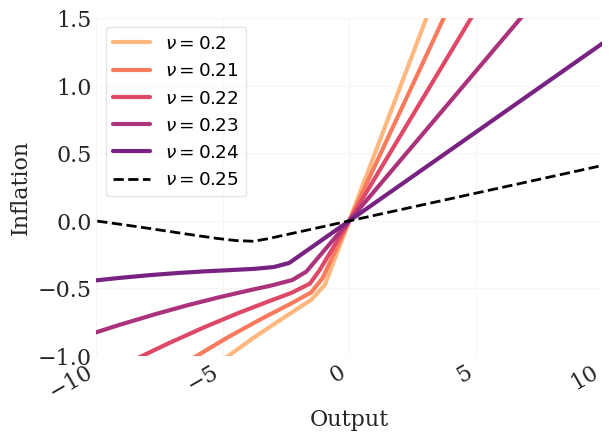

In [7]:
n = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.magma(np.linspace(.35,.85,n))[::-1])

figs, axs = figurator(1,1,1)

for nu in (.20, .21, .22, .23, .24):

    p = mod.set_par('nu', nu, p)

    x = np.linspace(-4,4,50)
    y0 = [mod.irfs(('e_u',s,0), p, T=1)[0][['y','Pi']].iloc[0].to_numpy() for s in x]

    axs[0].plot(*np.array(y0).T, lw=3, label='$\\nu = %s$' %round(nu,3))

nu = .25
p = mod.set_par('nu', nu, p)

x = np.linspace(-4,4,50)
y0 = [mod.irfs(('e_u',s,0), p, T=1)[0][['y','Pi']].iloc[0].to_numpy() for s in x]

axs[0].plot(*np.array(y0).T, '--', lw=2, c='k', label='$\\nu = %s$' %round(nu,3))

axs[0].set_xlabel('Output')
axs[0].set_ylabel('Inflation')
axs[0].set_xlim(-10,10)
axs[0].set_ylim(-1,1.5)
axs[0].legend()
figs[0].tight_layout()

## The left side of Figure 5

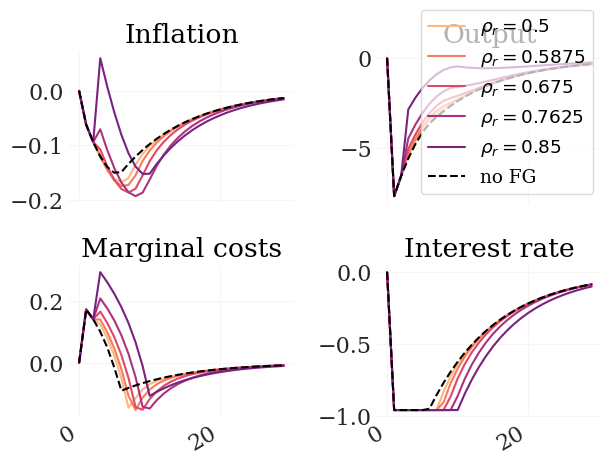

In [8]:
p = mod.set_par('nu',.25, p)

n = 5
vals = np.linspace(.5,.85,n)

pars = [mod.set_par('rho_r', val, p) for val in vals]

x0 = [mod.irfs([('e_u',2,1),('e_r',-2,3)], p)[0][v] for p in pars]
x1 = mod.irfs(('e_u',2,1), p)[0][v]

figs, axs = figurator(2,2,1)
pplot(tuple(x0), ax=axs, labels=vp, legend=['$\\rho_r=%s$' %val for val in vals])
pplot(x1, ax=axs, labels=vp, styles='--', colors='k', legend='no FG')
axs[1].legend(loc='lower right', framealpha=.7)
figs[0].tight_layout()

## The right side of Figure 5

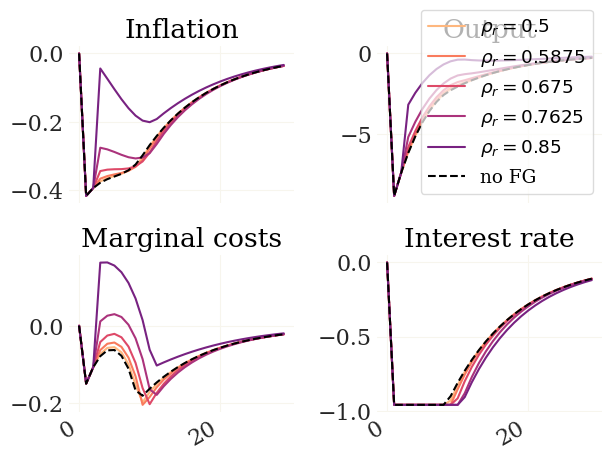

In [9]:
p = mod.set_par('nu',.24, p)

pars = [mod.set_par('rho_r', val, p) for val in vals]

vals = np.linspace(.5,.85,5)

x0 = [mod.irfs([('e_u',2,1),('e_r',-2,3)], p)[0][v] for p in pars]
x1 = mod.irfs(('e_u',2,1), p)[0][v]

figs, axs = figurator(2,2,1)
pplot(tuple(x0), ax=axs, labels=vp, legend=['$\\rho_r=%s$' %val for val in vals])
pplot(x1, ax=axs, labels=vp, styles='--', colors='k', legend='no FG')
axs[1].legend(loc='lower right', framealpha=.7)
figs[0].tight_layout()

## Figure 6

[inu: 3]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.74it/s]


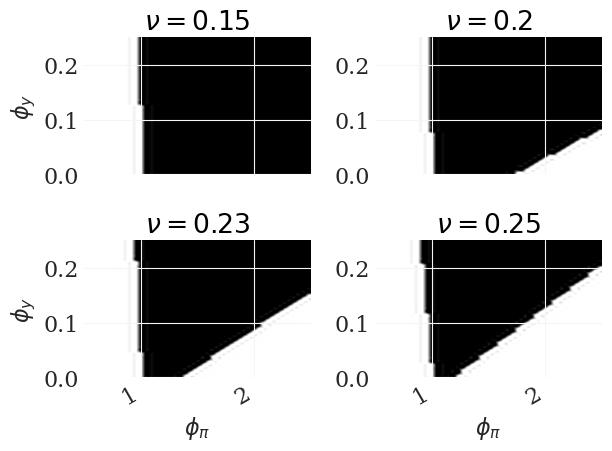

In [10]:
# the value in the paper is 500
#n = 500
# but to speed things up, let's go for 50
n = 50

xpi = np.linspace(.5,2.5,n)
xy = np.linspace(0,.25,n)
xnu = [.15,.2,.23,.25]

res = np.empty((4,n,n))

figs, axs = figurator(2,2)

for inu, nu in enumerate(xnu):
    pars = mod.set_par('nu',nu, p)
    pbar = tqdm(total=n, dynamic_ncols=True)
    pbar.set_description('[inu: %s]' %inu)

    for ipi,pi in enumerate(xpi):
        pars = mod.set_par('phi_pi', pi, pars)

        for iy,y in enumerate(xy):
            pars = mod.set_par('phi_y', y, pars)
            try:
                mod.set_par(pars)
                res[inu,iy,ipi] = True
            except ValueError:
                res[inu,iy,ipi] = False

        pbar.update(1)

    pbar.close()

    axs[inu].imshow(res[inu], cmap=None, origin='lower', interpolation='lanczos', aspect='auto', extent=(.5,2.5,0,.25))
    axs[inu].set_title('$\\nu = %s$' %nu)

axs[2].set_xlabel('$\\phi_\\pi$')
axs[3].set_xlabel('$\\phi_\\pi$')
axs[0].set_ylabel('$\\phi_y$')
axs[2].set_ylabel('$\\phi_y$')
figs[0].tight_layout()